In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.metrics import *

In [3]:
diamond = pd.read_csv('diamonds.csv.zip')
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamond.drop('Unnamed: 0' , axis=1 , inplace=True)

In [5]:
diamond['volume'] = diamond['x'] * diamond['y'] * diamond['z']

In [6]:
diamond.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
volume     0
dtype: int64

In [7]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  volume   53940 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.5+ MB


In [8]:
diamond.describe()

,carat,depth,table,price,x,y,z,volume
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,129.849403
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,78.245262
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,65.136830
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.808572
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,170.842451
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,3840.598060


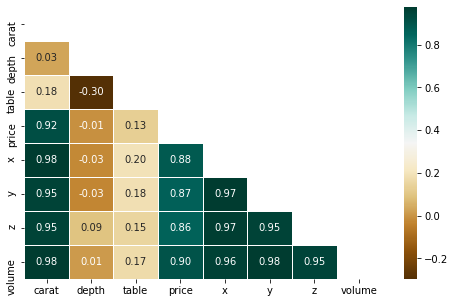

In [9]:
plt.figure(figsize=(8,5))
mask = np.triu(np.ones_like(diamond.corr() , dtype='bool'))
sns.heatmap(data=diamond.corr() , annot=True , fmt='.2f' ,  mask=mask, linewidths=1 , cmap='BrBG');

In [10]:
plt.style.use('seaborn-darkgrid')

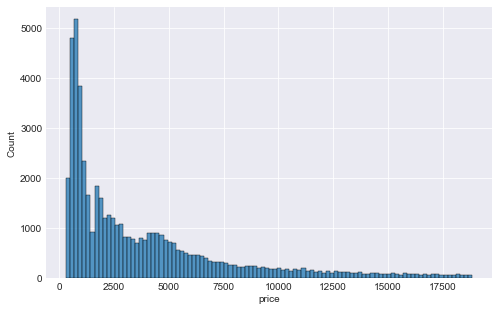

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(data=diamond , x='price' , bins=100);

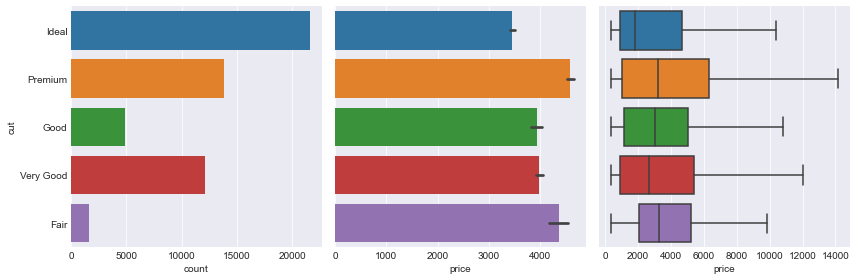

In [12]:
fig , ax=plt.subplots(1,3 , figsize=(12,4) , sharey=True)
sns.countplot(data=diamond , y='cut' , ax=ax[0])
sns.barplot(data=diamond , y='cut' , x='price' , ax=ax[1])
sns.boxplot(data=diamond , x='price' , y='cut' , showfliers=False , ax=ax[2])
ax[1].set_ylabel('')
ax[2].set_ylabel('')
plt.tight_layout()

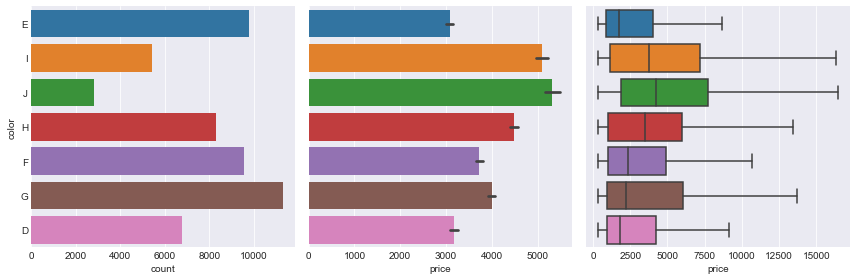

In [13]:
fig , ax=plt.subplots(1,3 , figsize=(12,4) , sharey=True)
sns.countplot(data=diamond , y='color' , ax=ax[0])
sns.barplot(data=diamond , y='color' , x='price' , ax=ax[1])
sns.boxplot(data=diamond , x='price' , y='color' , showfliers=False , ax=ax[2])
ax[1].set_ylabel('')
ax[2].set_ylabel('')
plt.tight_layout()

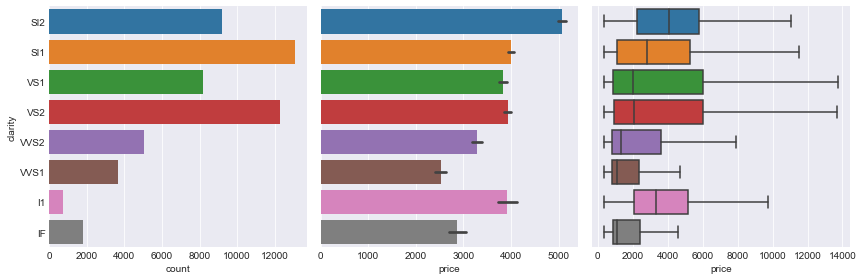

In [14]:
fig , ax=plt.subplots(1,3 , figsize=(12,4) , sharey=True)
sns.countplot(data=diamond , y='clarity' , ax=ax[0])
sns.barplot(data=diamond , y='clarity' , x='price' , ax=ax[1])
sns.boxplot(data=diamond , x='price' , y='clarity' , showfliers=False , ax=ax[2])
ax[1].set_ylabel('')
ax[2].set_ylabel('')
plt.tight_layout()

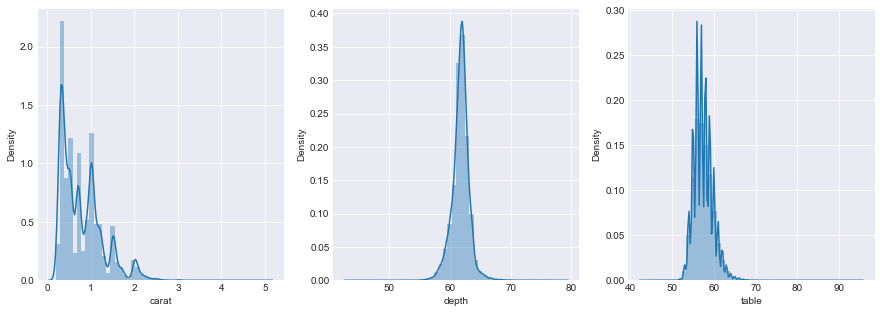

In [15]:
fig , ax = plt.subplots(1,3 , figsize=(15,5))
for i , c  in enumerate(diamond[['carat' , 'depth' , 'table']]):
    sns.distplot(diamond[c] , ax=ax[i])

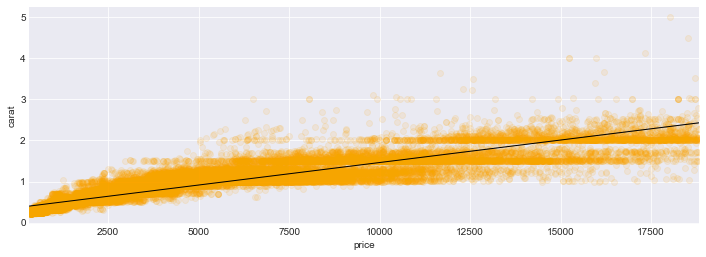

In [16]:
plt.figure(figsize=(12,4))
sns.regplot(data=diamond , x='price' , y='carat' , line_kws=dict(color='black' , linewidth=1) 
            , scatter_kws=dict(alpha=0.1 , color='orange'));

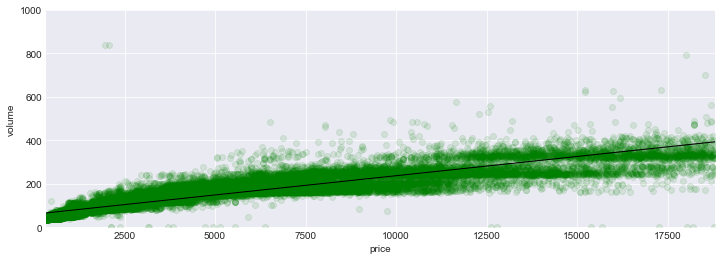

In [17]:
plt.figure(figsize=(12,4))
sns.regplot(data=diamond , x='price' , y='volume' , line_kws=dict(color='black' , linewidth=1) 
            , scatter_kws=dict(alpha=0.1, color='green'))
plt.ylim(ymin=0 , ymax=1000);

# Prediction

In [18]:
diamond.drop(['x','y','z'] , axis=1 , inplace=True)

In [19]:
features = diamond.drop('price' , axis=1)
target = diamond['price']

In [20]:
scaler = StandardScaler()

In [21]:
num = pd.DataFrame(scaler.fit_transform(features[['carat','depth','table','volume']]) 
                   , columns=['carat','depth','table','volume'])

In [22]:
cat_lis = []
for i in features.columns :
    if features[i].dtype == 'object':
        cat_lis.append(features[i].str.get_dummies())
        cat = pd.concat(cat_lis , axis=1)

In [23]:
features_scaled = pd.concat([num , cat] , axis=1)

In [24]:
x_train , x_test , y_train , y_test = train_test_split(features_scaled , target , train_size=0.7 , random_state=101)

In [25]:
def predict(algor):
    algor.fit(x_train , y_train)
    y_pred = algor.predict(x_test)
    score = cross_val_score(algor , x_train , y_train , cv=5)
    
    print(f"----- {str(algor).replace('()','')} -----")
    print('\n',score)
    print(f'Score = {algor.score(x_test , y_test).round(4)}\n')
    print(f'MAE = {mean_absolute_error(y_test , y_pred).round(4)}')
    print(f'MSE = {mean_squared_error(y_test , y_pred).round(4)}')
    print(f'RMSE = {np.sqrt(mean_absolute_error(y_test , y_pred)).round(4)}')
    print(f'R-Square = {r2_score(y_test , y_pred).round(4)}')

In [27]:
predict(LinearRegression())

----- LinearRegression -----

 [0.91442531 0.914924   0.91833275 0.91714337 0.91592227]
Score = 0.9139

MAE = 810.2958
MSE = 1385114.5187
RMSE = 28.4657
R-Square = 0.9139


In [28]:
predict(Lasso())

----- Lasso -----

 [0.91445956 0.91493961 0.91832614 0.91712227 0.91583701]
Score = 0.914

MAE = 807.1759
MSE = 1382745.2542
RMSE = 28.4108
R-Square = 0.914


In [29]:
predict(Ridge())

----- Ridge -----

 [0.91445039 0.91492583 0.91831471 0.91714964 0.91592093]
Score = 0.9138

MAE = 809.7545
MSE = 1386037.4675
RMSE = 28.4562
R-Square = 0.9138


In [30]:
predict(KNeighborsRegressor())

----- KNeighborsRegressor -----

 [0.95371803 0.95525438 0.95509626 0.95176139 0.95126719]
Score = 0.9553

MAE = 461.0989
MSE = 718546.8573
RMSE = 21.4732
R-Square = 0.9553


In [31]:
predict(DecisionTreeRegressor())

----- DecisionTreeRegressor -----

 [0.96180395 0.96548353 0.96634028 0.9645804  0.96493969]
Score = 0.9664

MAE = 366.1193
MSE = 540797.9941
RMSE = 19.1342
R-Square = 0.9664
